In [10]:
#%run KNN_Model.ipynb
#import import_ipynb
#import RFR_model;

In [61]:
import math
from datetime import datetime
import numpy as np
import pandas as pd
import seaborn as sns # for visualiation
import matplotlib.pyplot as plt # plotting
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

df = pd.read_csv('./facebook_with_reactions.csv')
outcomes = df[['Rating']]

## drop useless columns 
df = df.drop(columns=['Debate', 'status_link', 'permalink_url', 'Post URL', 
                      'status_message', 'link_name', 'share_count', 'Unnamed: 0', 'account_id',
                      'status_id', 'status_type', 'status_published', 'post_id', 'reaction_count', 'Date Published'])

## change Rating to numeric for classification
df['Rating2'] = df.Rating.replace(['mostly false', 'no factual content', 'mixture of true and false', 'mostly true'], [0,1,2,3])
df.Rating = df.Rating2.replace([0,1,2,3], [0,0,0,1]).astype(int)



## remove spaces in columns
df.columns = [c.replace(' ', '_') for c in df.columns]

## make dummy columns (make categories numeric)
df = pd.get_dummies(df)

In [82]:
df.columns

Index(['Rating', 'comment_count', 'num_reactions', 'num_comments',
       'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas',
       'num_sads', 'num_angrys', 'Rating2', 'Category_left',
       'Category_mainstream', 'Category_right', 'Page_ABC News Politics',
       'Page_Addicting Info', 'Page_CNN Politics', 'Page_Eagle Rising',
       'Page_Occupy Democrats', 'Page_Politico', 'Page_Right Wing News',
       'Page_The Other 98%', 'Post_Type_link', 'Post_Type_photo',
       'Post_Type_text', 'Post_Type_video'],
      dtype='object')

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

tr_feat, test_feat, tr_out, test_out = train_test_split(
   df.drop(columns=['Rating', 'Rating2']),      # features
   df.Rating,    # outcome
   random_state=0,
   test_size=0.20, # percentage of data to use as the test set
   
)

tr2_feat, test2_feat, tr2_out, test2_out = train_test_split(
   df.drop(columns=['Rating', 'Rating2']),      # features
   df.Rating2,    # outcome
   random_state=0,
   test_size=0.20, # percentage of data to use as the test set
   
)

In [27]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif

from sklearn.neural_network import MLPRegressor


from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline 

import helper_RF as l

In [93]:
### Multi-layer Perceptron
mod = MLPRegressor(random_state=0)

scal = RobustScaler()
select_k_best = SelectKBest(f_classif)
m_pipe = make_pipeline(scal, select_k_best, mod)

m_param_grid = {'selectkbest__k':range(5, 25),
                'mlpregressor__activation':['relu', 'logistic'], 
                'mlpregressor__learning_rate':['adaptive'],
                'mlpregressor__solver':['lbfgs', 'adam'],
                'mlpregressor__hidden_layer_sizes':[(33,33,33)]}
#mod.early_stopping=True # terminate training when validation score is not improving
mod.shuffle=True # shuffle samples when training

mlp_2class = GridSearchCV(m_pipe, m_param_grid, cv=3, n_jobs=-1)
mlp_2class.fit(tr_feat, tr_out);
mlp_2class.score(test_feat, test_out)

0.3815456496887665

In [94]:
mlp_2class.best_params_

{'mlpregressor__activation': 'logistic',
 'mlpregressor__hidden_layer_sizes': (33, 33, 33),
 'mlpregressor__learning_rate': 'adaptive',
 'mlpregressor__solver': 'adam',
 'selectkbest__k': 24}

In [95]:
mlp_4class = GridSearchCV(m_pipe, m_param_grid, cv=3, n_jobs=-1)
mlp_4class.fit(tr2_feat, tr2_out);

In [96]:
mlp_4class.score(test2_feat, test2_out)

0.34434484594317605

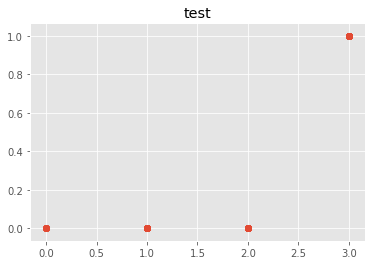

In [101]:
plt.title('test')
plt.scatter(test2_out, test_out)